# Enonce

## Explication de la situation
Bob et victime d'un mauvais sort. 
Il se sent toujours un peu déphasé et vous savez que le rituel pour lever cette malédiction est consignée
dans un grimoire qui se trouve dans une bibliothèque quantique. 

Le problème est que dans une bibliothèque quantique l'emprunt se fait toujours au hasard. En empruntant un
grimoire vous ne savez pas sur lequel vous allez tomber. 
La bonne nouvelle est que cette section de la bibliothèque ne compte que trois autres grimoires. 
La mauvaise c'est que ceux-ci ne contiennent que plus de malédiction.

Pour vous aider, vous faites appel à Aika qui a le pouvoir de marquer le bon grimoire en inversant sa phase
quantique. 

## Enonce du défis
Votre défi utiliser les pouvoirs d'inversion de phase d'Aika et votre maîtrise de l'interférence pour
maximiser vos chances d'emprunter le bon grimoire et ainsi lever le mauvais sort qui afflige Bob.

## Solution
En combinant vous connaissances à celle d'Aika vous mettez en place un algorithme bien connu en informatique
quantique: l'algorithme de Grover.

## Explication de la solution
La bibliothèque quantique attribue initialement une chance égale d'emprunter n'importe lequel de ces
grimoires.

### Repartition des probabilités
Dans l'état actuel des choses si vous empruntez un grimoire vous avez une chance sur quatre de tomber sur le
banc, on peut donc attribuer à chacun des grimoires une probabilité de 1/4.

Pour décrire la situation dans le monde quantique, on assigne d’abord chaque grimoire à un état quantique. 
Ensuite il est plus facile de travailler avec l'histogramme des amplitudes  de probabilité qui permettent de
montrer la phase de chaque État.

Les amplitudes de probabilité de chaque État sont fixés à 1/2.
Les probabilités d'obtenir chacun de ces résultats sont en fait donnés par le carré de l'amplitude de
probabilité donc 1/4. 

Initialement, chaque grimoire a une amplitude de probabilité de 1/2 et une probabilité de 1/2 au carré est 1/4.

### Phase d'oracle

Aika utilise son pouvoir pour marquer le grimoire dans lequel se trouve le rituel en
inversant sa phase, mais n'allez pas emprunter un grimoire trop vite. 
En effet, la probabilité d'emprunter le bon grimoire n'a pas changé et elle est toujours d'une chance sur 4. 

### Phase diffuseur
Vous prenez alors le relais avec un opérateur quantique que vous avez conçu. Vous l'appelez le diffuseur et il agit d'une manière bien particulière.

#### Explication de l'application du diffuseur

Illustrons son application sur un seul grimoire, c'est-à-dire sur un histogramme ou un grimoire à 100% des chances d'être emprunté, par exemple le numéro 0.

Votre diffuseur produit alors une superposition uniforme de tous les États, mais où la phase du grimoire de
départ est inversée.
- l'effet de ce diffuseur sur l'état 01 est :
- son effet sur l'état 1 0 qui serait déphasé est:
- et finalement sur l'état 1 1:

#### Application à notre cas:
Votre diffuseur lorsque appliqué sur l'état préparé par aïka agit sur les quatre grimoires en parallèle comme si chaque grimoire avait 100% de chance d'être emprunté: l'État qu'il produit est simplement la somme des 4 résultats individuels.

l'application de votre diffuseur permet donc aux amplitudes de probabilité d'interférer entre elles.
Ainsi les amplitudes négatives compensent les amplitudes positives et les positives s'additionnent entre elles.
Ce qui augmente l'amplitude associée au grimoire recherché et diminue l'amplitude des autres.
Dans le cas présent, l'application de l'inversion de phase et de l'opérateur d'interférence augmente à 100%. 
la probabilité d'emprunt du bon grimoire.


Pour représenter cette énigme sur un ordinateur quantique, nous utiliserons plusieurs portes quantiques: 
- la porte note transformer l'état des qubits en leur état opposé pour cet algorithme:
- la porta Damart est utilisée pour passer de la base 0 et 1 à la base plus et moins 
- la porte Z fait faire une rotation de 180 degrés autour de l'axe des aides ce qui est équivalent à inverser la phase de l'État 1. elle peut par exemple transformer l'état plus en l'état moins .
- finalement la porte contrôle Z utilise deux qubits un Cubit de contrôle et un Cubit de cible. si le Cubit de contrôle est dans l'état 1 une porte Z est appliquée au cube. comme une portée Z n'a un effet que sur l'état 1 la porte CZ n'a défait que si l'état des deux qubits est un.




# Implemantation du code quantique de la solution

In [27]:
import numpy as np
from matplotlib import *
from qiskit import *

## Initialisation

In [28]:
from qiskit import Aer
from qiskit.visualization import plot_state_city

# On crée notre moteur de calcul
backend = Aer.get_backend('statevector_simulator')

def draw_propabilities(circuit):
    # On lance le calcul quantique
    job = backend.run(circuit)
    # Affichons le résultat
    result = job.result()
    # On a simplement des vecteurs d'état
    outputstate = result.get_statevector(circuit,decimals=2)
    
    # print(outputstate)
    return outputstate

In [29]:
#Comme il y a 4 grimoires il est possible d'utiliser un système de deux qubits 
# possédant les quatre états de base suivants.
# On associe chacun d'eux à un des grimoire.
# Ce qui nous fait 2 qubits
possibilitiesR = QuantumRegister(2)

# Créons un registre classique pour y mesure nos réponses
measureR = ClassicalRegister(1)

# Petit rappel les Cubits sont notés de la droite vers la gauche. 

# Créons le circuit
circ = QuantumCircuit(possibilitiesR, measureR)

# Affichons le cicruit
circ.draw()

q4_0: 
      
q4_1: 
      
c3: 1/

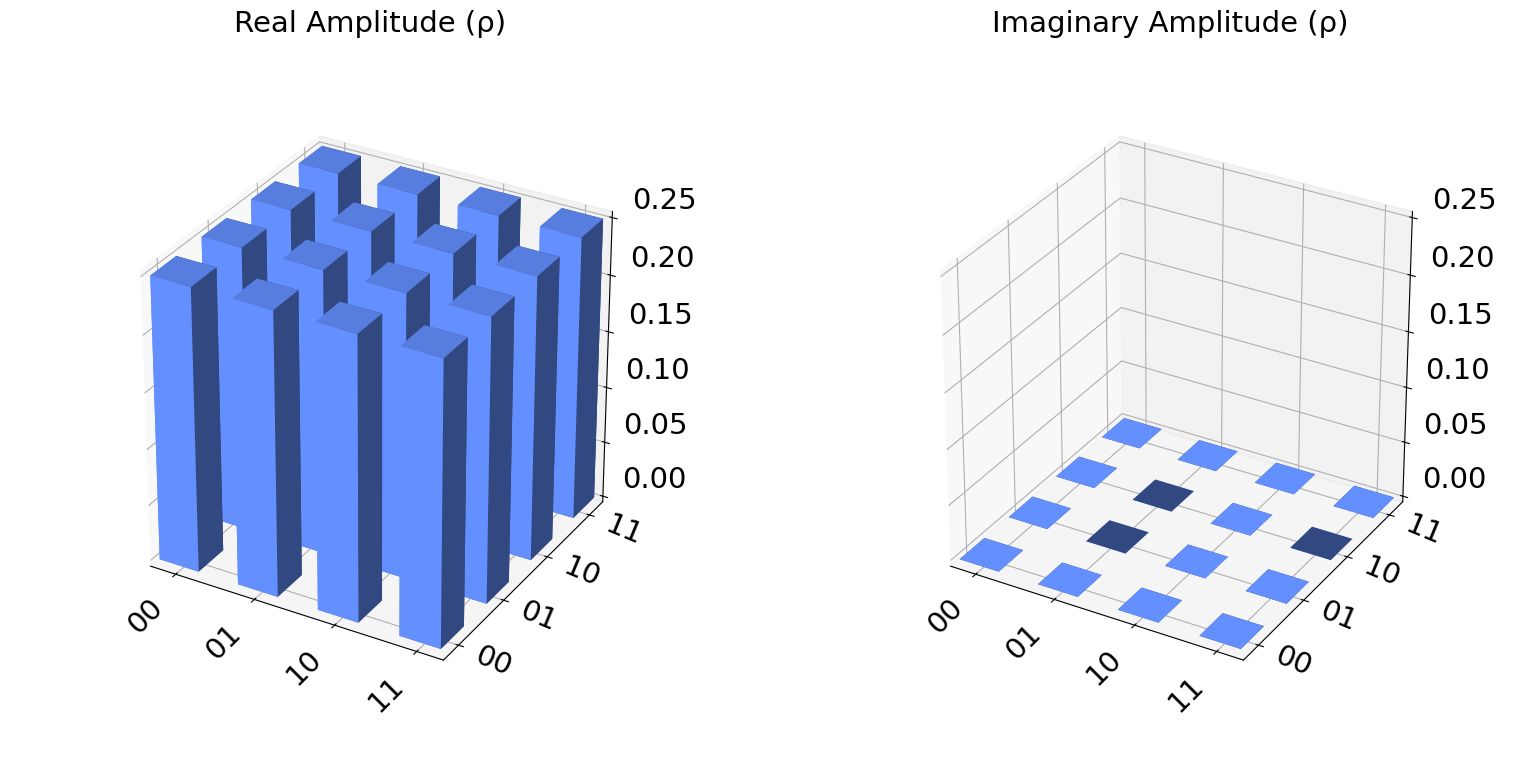

In [30]:
#  Au départ tous les grimoires ont la même probabilité d'être empruntée: 
#   c'est la politique de la bibliothèque quantique. 
#  On peut obtenir cette distribution de probabilité 
#  en ajoutant des portes à Hadamart sur q0 et Q1.
circ.h(0)
circ.h(1)

# Affichons le circuit obtenu
circ.draw()

# voici les histogrammes des amplitudes de probabilité et des probabilités du système.
plot_state_city(draw_propabilities(circ))

## Phase Oracle

In [31]:
circ.barrier(0, 1)
circ.draw()

┌───┐ ░ 
q4_0: ┤ H ├─░─
      ├───┤ ░ 
q4_1: ┤ H ├─░─
      └───┘ ░ 
c3: 1/════════

In [32]:
# Notez que à ce point Aika utilise son pouvoir d'inversion de phase dans l'oracle et marque le bon grimoire.
# Pour cet exemple, le rituel est inscrit dans le grimoire 2 et le pouvoir d'Aika peut être représenté 
# par la succession de portes suivantes ce qui aura pour effet de rendre la phase de l'État 1-0 négatif 
# sans affecter les autres phases.

circ.x(0)
circ.cz(0, 1)
circ.x(0)

circ.draw()

┌───┐ ░ ┌───┐   ┌───┐
q4_0: ┤ H ├─░─┤ X ├─■─┤ X ├
      ├───┤ ░ └───┘ │ └───┘
q4_1: ┤ H ├─░───────■──────
      └───┘ ░              
c3: 1/═════════════════════

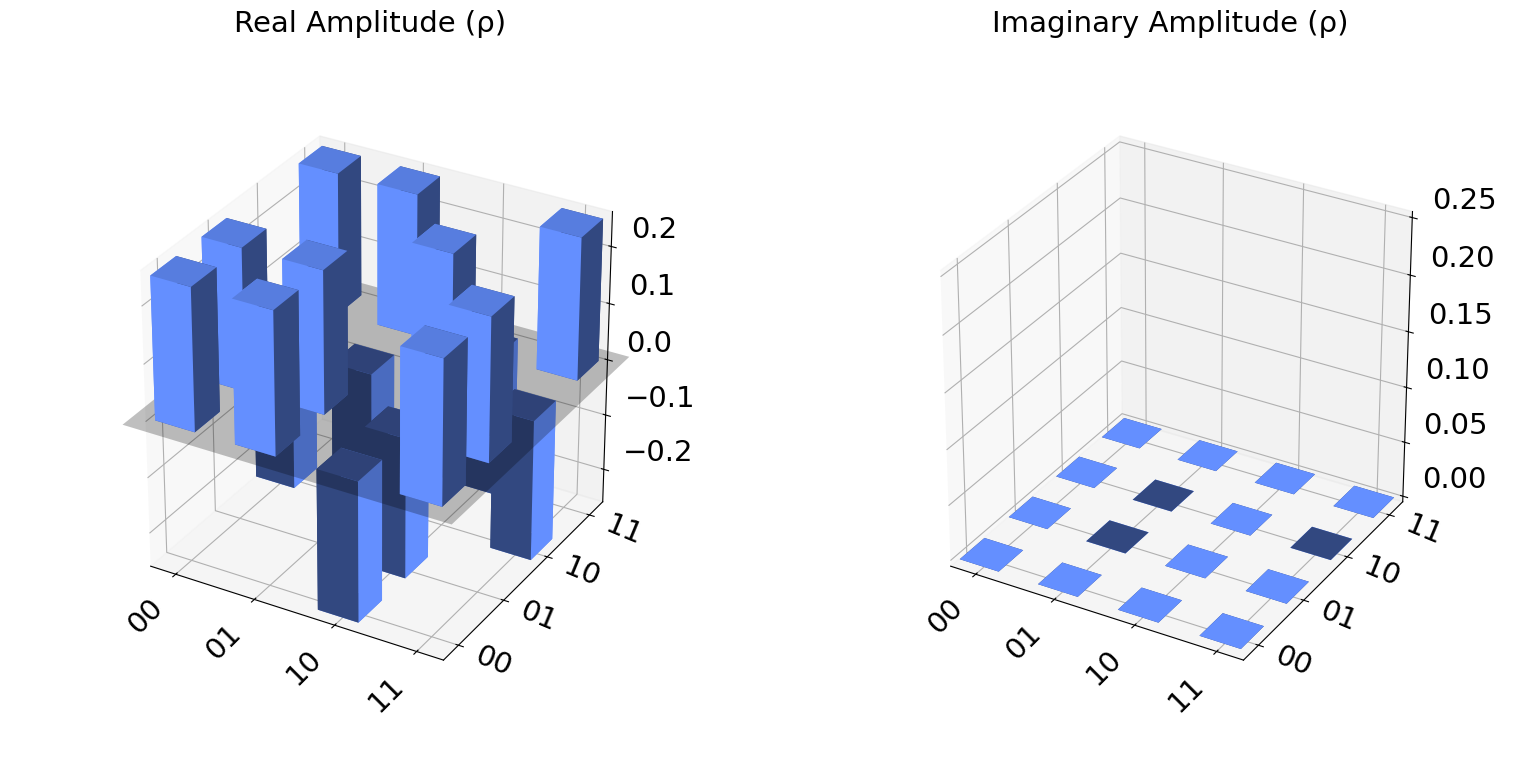

In [33]:
# Affichons un histogramme
plot_state_city(draw_propabilities(circ))

## Phase Diffuseur

In [34]:
circ.barrier(0, 1)
circ.draw()

┌───┐ ░ ┌───┐   ┌───┐ ░ 
q4_0: ┤ H ├─░─┤ X ├─■─┤ X ├─░─
      ├───┤ ░ └───┘ │ └───┘ ░ 
q4_1: ┤ H ├─░───────■───────░─
      └───┘ ░               ░ 
c3: 1/════════════════════════

In [35]:
# Vous savez qu'il est encore trop tôt pour passer au comptoir d'emprunt.
# il est essentiel d'appliquer d'abord votre diffuseur qui peut être implémenté par le circuit suivant:

circ.h(0)
circ.h(1)

circ.z(0)
circ.z(1)

circ.cz(0, 1)

circ.h(0)
circ.h(1)

circ.draw()

┌───┐ ░ ┌───┐   ┌───┐ ░ ┌───┐┌───┐   ┌───┐
q4_0: ┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├┤ Z ├─■─┤ H ├
      ├───┤ ░ └───┘ │ └───┘ ░ ├───┤├───┤ │ ├───┤
q4_1: ┤ H ├─░───────■───────░─┤ H ├┤ Z ├─■─┤ H ├
      └───┘ ░               ░ └───┘└───┘   └───┘
c3: 1/══════════════════════════════════════════

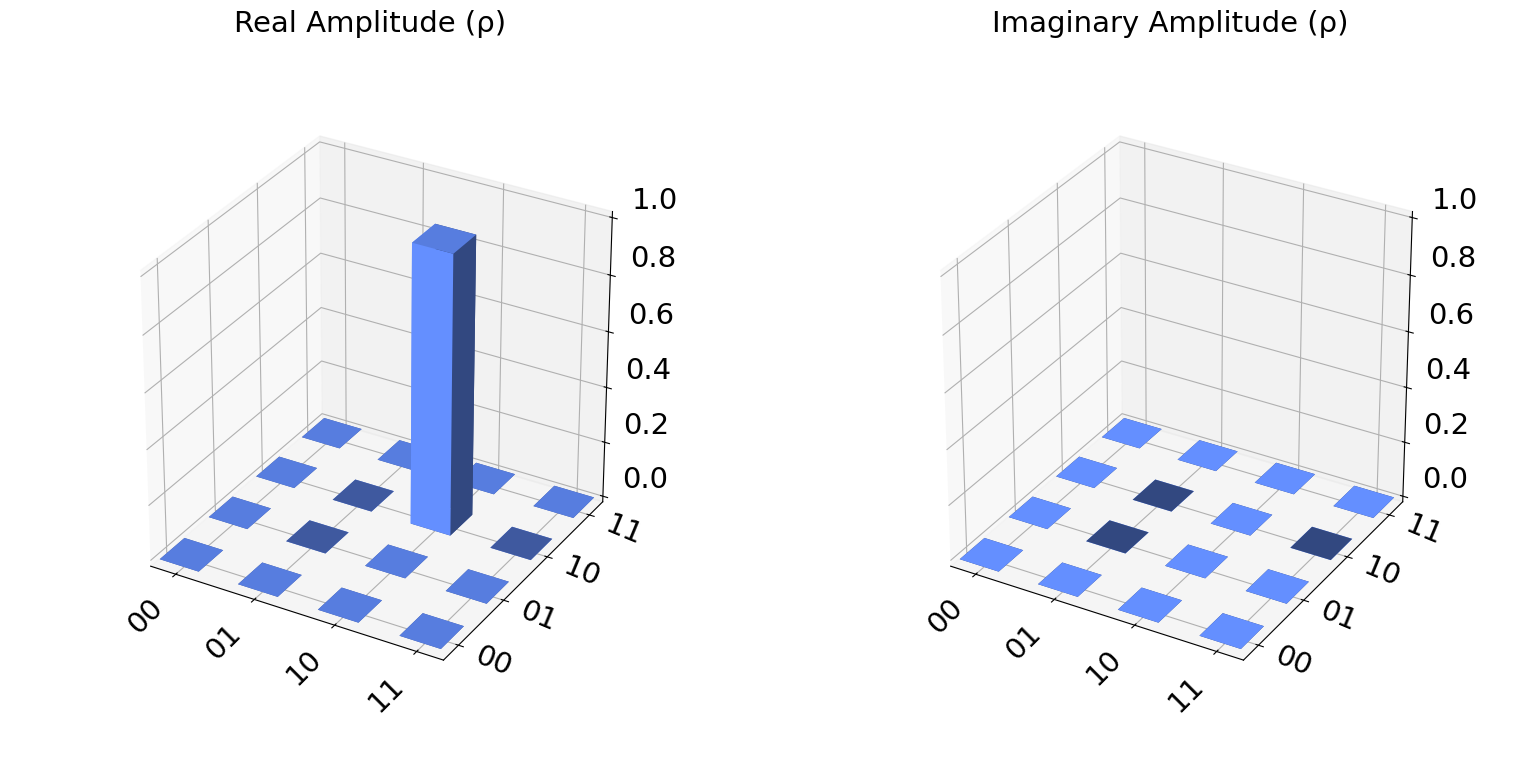

In [36]:
# Une fois que vous avez appliqué votre diffuseur, 
# les probabilités d'emprunt pour tous les grimoires sont nuls sauf pour le bon.
# Vous pouvez enfin passer au comptoir d'empereur en espérant que la situation de Bob ne se soit pas empirée.

plot_state_city(draw_propabilities(circ))

In [37]:
# Dans cet exemple le pouvoir d'inversion de phase daika pouvait être représenté 
# par l'oracle suivant pour inverser la phase du Grimoire 2 
# voici les oracles qui auraient dû être appliqués si le rituel se trouvait dans les grimoires 0

circ.measure(0,0)
circ.measure(1,0)

circ.draw()

┌───┐ ░ ┌───┐   ┌───┐ ░ ┌───┐┌───┐   ┌───┐┌─┐   
q4_0: ┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├┤ Z ├─■─┤ H ├┤M├───
      ├───┤ ░ └───┘ │ └───┘ ░ ├───┤├───┤ │ ├───┤└╥┘┌─┐
q4_1: ┤ H ├─░───────■───────░─┤ H ├┤ Z ├─■─┤ H ├─╫─┤M├
      └───┘ ░               ░ └───┘└───┘   └───┘ ║ └╥┘
c3: 1/═══════════════════════════════════════════╩══╩═
                                                 0  0